Deciding whether a used car is worth the posted price when you see listings online can be difficult. Several factors, including mileage, make, model, year, etc. can influence the actual worth of a car. From the perspective of a seller, it is also a dilemma to price a used car appropriately. Based on existing data, the aim is to use machine learning algorithms to develop models for predicting used car prices

The dataset contains information about used cars that was presented for sale on TrueCar.com and the data icludes 8 Column as Follows:

Price : Price in dollars of the used car, this will be our target

Year : The year when the Car was manufactured

Mileage : Number of miles that the car has made and this represents the usage density of the car

City : The City of the Seller

State : The State of the seller

Vin : Veighcle Identity number and this is a unque key for the car

Make : Manufacturer name

Model : Model of the Car

let's start this by importing the necessary libararies,

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
car = pd.read_csv("/content/Car.csv")

In [3]:
#first five columns of the car dataset
car.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


Let's check if there are any missing values present in the car dataset,

In [4]:
car.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      1
Vin        1
Make       1
Model      1
dtype: int64

as we can see there is 1 whole row missing, we don't have any information about the state, Vin, Make, Model of the car so it will not make sense to move further with the row so lets drop the same.

In [5]:
cars = car.dropna()

In [6]:
cars.isnull().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

Now we have clean data so lets check the duplicate values as well as the data types

In [7]:
cars.shape

(34068, 8)

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34068 entries, 0 to 34067
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Price    34068 non-null  int64 
 1   Year     34068 non-null  int64 
 2   Mileage  34068 non-null  int64 
 3   City     34068 non-null  object
 4   State    34068 non-null  object
 5   Vin      34068 non-null  object
 6   Make     34068 non-null  object
 7   Model    34068 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.3+ MB


In [9]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,34068.0,24921.324058,17536.870482,1880.0,15495.00,22000.0,29999.00,279990.0
Year,34068.0,2012.658741,3.470073,1997.0,2011.00,2014.0,2015.00,2018.0
Mileage,34068.0,53311.886228,38552.211784,5.0,25536.75,42615.5,76076.75,492220.0


In [10]:
duplicates = cars.duplicated()
sum(duplicates)

0

In [11]:
cars.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

In [12]:
cars.Make.value_counts()

Audi       12618
Acura      11049
BMW         9822
Bentley      367
Aston        149
Alfa          44
AM            19
Name: Make, dtype: int64

In [13]:
cars.Model.value_counts()

3                  6907
MDXAWD             1568
TLXFWD             1278
A42.0T             1209
RDXAWD             1035
                   ... 
A84.2L                1
allroadPrestige       1
S4Prestige            1
R85.2                 1
X3xDrive35i           1
Name: Model, Length: 207, dtype: int64

In [14]:
cars.Vin.value_counts()

19VDE2E53EE000083    1
WAUW2AFC3DN081979    1
WAUR2AFD8EN008291    1
WAUG8AFC6HN049990    1
WAUFGAFC6GN092545    1
                    ..
WAUDF78E48A099921    1
WAUDF78E66A183106    1
WAUBFAFL5EN009749    1
WAUAFAFL1BN021355    1
5UXFA13576LY41131    1
Name: Vin, Length: 34068, dtype: int64

In [15]:
cars.City.value_counts()

Houston          482
Marietta         418
Austin           416
Plano            388
San Antonio      385
                ... 
Cayce              1
Klamath Falls      1
Salinas            1
Wentzville         1
Blauvelt           1
Name: City, Length: 1786, dtype: int64

In [16]:
cars.State.value_counts()

 CA    4138
 TX    3820
 FL    3379
 IL    2076
 GA    1866
 NJ    1731
 VA    1686
 NY    1361
 CO    1308
 PA    1246
 NC    1207
 WA    1200
 MA     848
 AZ     775
 MD     750
 OH     695
 CT     548
 OR     476
 TN     472
 IN     428
 UT     428
 NV     331
 KY     300
 MO     289
 AL     275
 MN     263
 WI     249
 OK     225
 KS     217
 LA     196
 SC     190
 HI     138
 MI     114
 AR     111
 NH     100
 ID      91
 NM      80
 NE      67
 RI      60
 MS      56
 IA      55
 DE      55
 ME      44
 WV      27
 Oh      17
 Fl      14
 VT      13
 AK      12
 SD      11
 ND       9
 MT       7
 WY       5
 Md       3
 ga       2
 DC       2
 Az       1
 Va       1
Name: State, dtype: int64

We have 4 object dtypes columns. To convert them into machine readable we will use label encoder,

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cars['Vin'] = le.fit_transform(cars['Vin'])
cars['Make'] = le.fit_transform(cars['Make'])
cars['Model'] = le.fit_transform(cars['Model'])
cars['City'] = le.fit_transform(cars['City'])
cars['State'] = le.fit_transform(cars['State'])

cars.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,437,47,3962,1,59
1,10888,2013,19606,878,37,3697,1,58
2,8995,2013,48851,437,47,3960,1,59
3,10999,2014,39922,1743,6,3814,1,58
4,14799,2016,22142,855,48,32,1,61


Lets See in graphs how factors affect the price, 

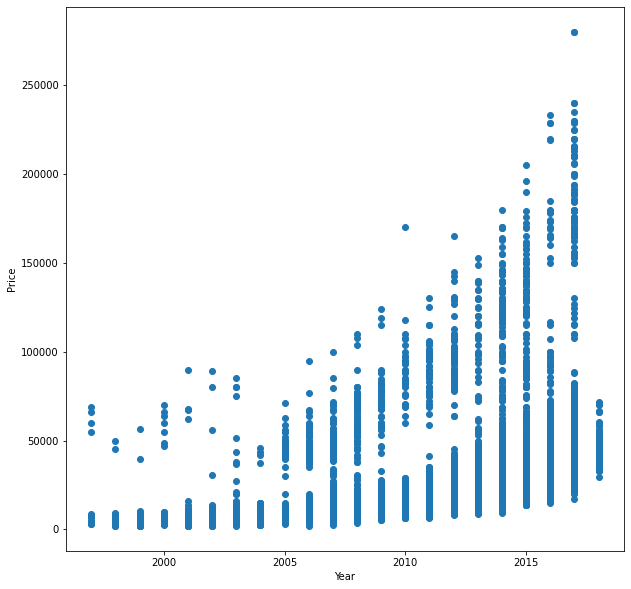

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(x='Year',y='Price',data=cars)
plt.xlabel('Year')
plt.ylabel('Price');

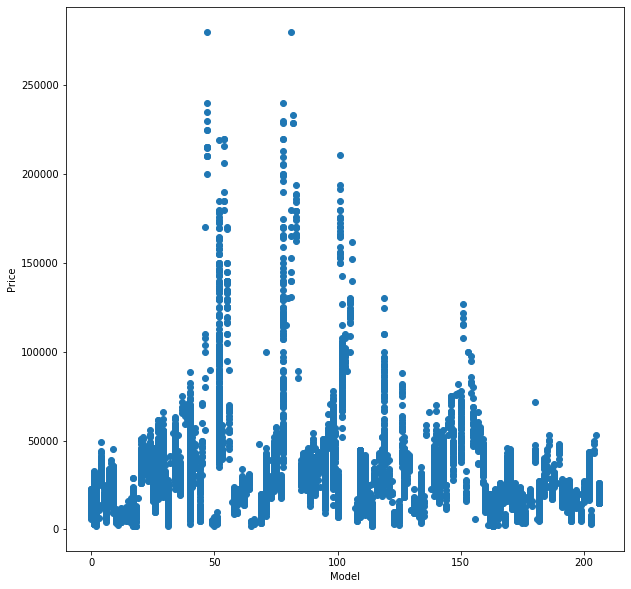

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(x='Model',y='Price',data=cars)
plt.xlabel('Model')
plt.ylabel('Price');

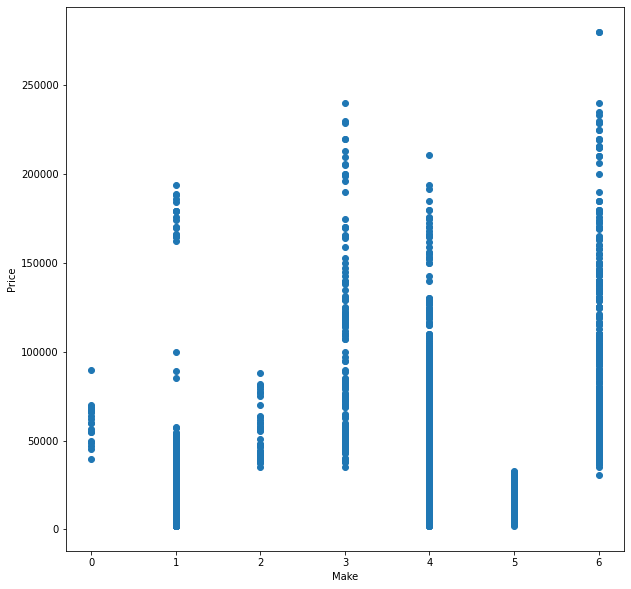

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(x='Make',y='Price',data=cars)
plt.xlabel('Make')
plt.ylabel('Price');

We will move forward and check if there are any outliers present,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


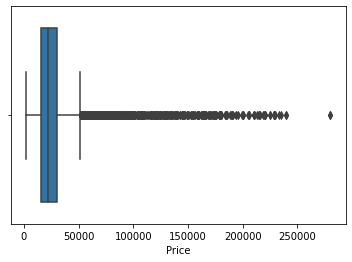

In [21]:
sns.boxplot(cars['Price']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


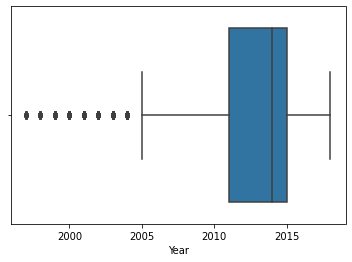

In [22]:
sns.boxplot(cars['Year']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


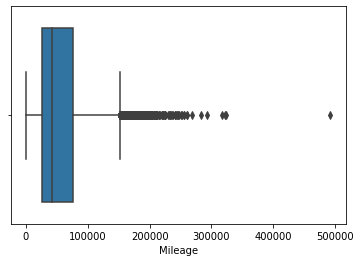

In [23]:
sns.boxplot(cars['Mileage']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


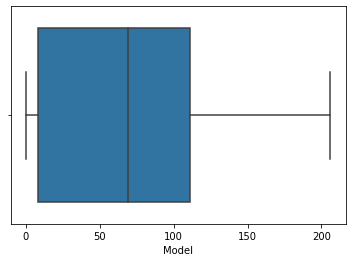

In [24]:
sns.boxplot(cars['Model']);

The columns Price, Mileage, Year having outliers but the model column don't have any.

Now lets check the correlation present between columns,

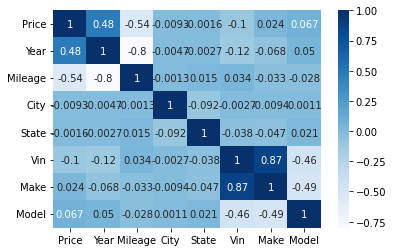

In [25]:
sns.heatmap(cars.corr(),cbar=True,annot=True,cmap='Blues');

Descriptive Statistics is for columns Price :
 count     34069.000000
mean      24921.179459
std       17536.633410
min        1880.000000
25%       15495.000000
50%       22000.000000
75%       29999.000000
max      279990.000000
Name: Price, dtype: float64


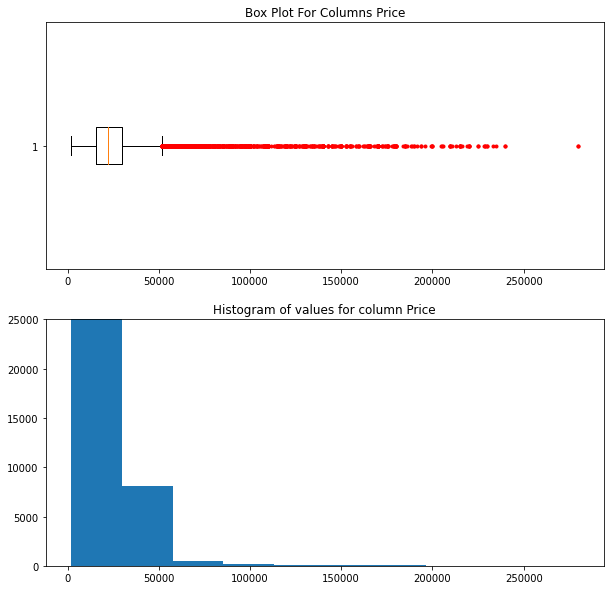

Descriptive Statistics is for columns Year :
 count    34069.000000
mean      2012.658751
std          3.470022
min       1997.000000
25%       2011.000000
50%       2014.000000
75%       2015.000000
max       2018.000000
Name: Year, dtype: float64


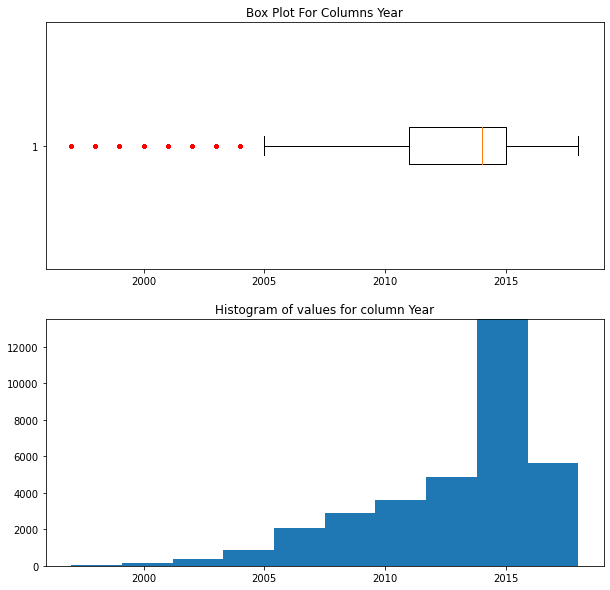

Descriptive Statistics is for columns Mileage :
 count     34069.000000
mean      53311.805512
std       38551.648845
min           5.000000
25%       25538.000000
50%       42621.000000
75%       76076.000000
max      492220.000000
Name: Mileage, dtype: float64


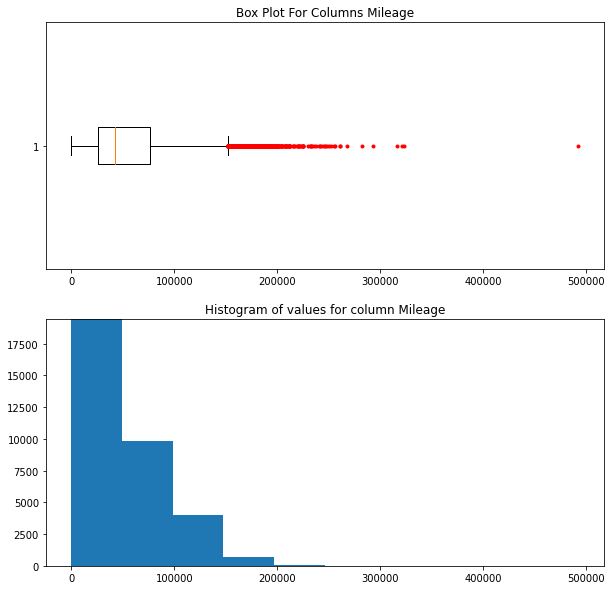

In [26]:
for i in car.columns.to_list():
    if str(car[i].dtype) == 'int64':
        # Print Statistics of it
        print("Descriptive Statistics is for columns {} :\n {}".format(i, car[i].describe()))
        fig, ax = plt.subplots(2,1, figsize = (10,10))
        ax[0].set_title(f"Box Plot For Columns {i}")
        ax[0].boxplot(car[i], vert = False, sym = "r.")
        ax[1].set_title(f"Histogram of values for column {i}")
        r = ax[1].hist(car[i], histtype = "bar")
        ax[1].set_ylim(top = np.max(r[0]) + 10)
        plt.show()

After the EDA lets move towards the modelling part, I will first try the linear regression,
firstly specify the dependent and independent variables,  

In [27]:
x = cars.drop(columns = ["Price"])
y = cars.Price

Split the datasets into 2 parts train and test, 

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Standardization,

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(X_train)
x_test_std = sc.transform(X_test)

In [41]:
from sklearn.metrics import r2_score, mean_squared_error

Performing linear regression on the dataset,

In [44]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression()
linearRegression.fit(x_train_std, y_train)
y_pred = linearRegression.predict(x_test_std)
y_pred

array([30053.52446893, 26756.47174443, 27614.53417769, ...,
       30977.7884303 , 35036.09105739, 32912.67965052])

In [45]:
# model evaluation
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# printing values
print('Slope:' ,linearRegression.coef_)
print('Intercept:', linearRegression.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [ 2080.94766428 -7568.95741137   -53.07699497   157.40082092
 -6053.86029347  6193.65611396  1109.73931573]
Intercept: 25055.10773274913
Root mean squared error:  184096733.71971145
R2 score:  0.3502622248207927


R2 score for linear regressio is very low.

Performing the second model random forest,

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train_std, y_train)
y_pred2 = rf.predict(x_test_std)
y_pred2

array([22633.93, 18801.89, 24760.09, ..., 22008.8 , 36433.  , 52790.54])

In [48]:
# model evaluation
rmse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  9773227.413788596
R2 score:  0.9655070738744154


R2 score for random forest is far better than the linear regression hence we can conclude that the random forest is better fit for our dataset.